In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Logistic Regression - Binary Classification

In [44]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


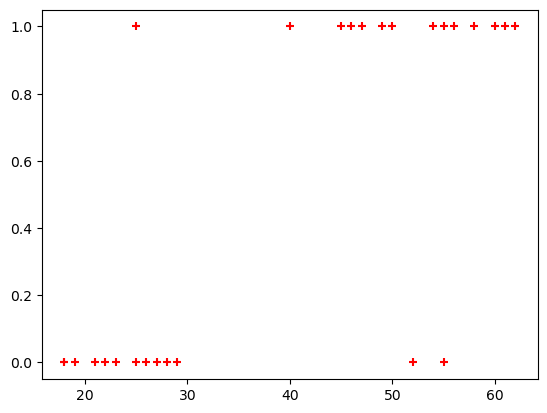

In [45]:
plt.scatter(df["age"],df["bought_insurance"], marker = "+", c = "red")

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df[["age"]],df["bought_insurance"], test_size = 0.1, random_state = 42)

In [48]:
X_test

,age
8,62
13,29
9,61


In [49]:
model = linear_model.LogisticRegression()

In [50]:
model.fit(X_train, y_train)

LogisticRegression()

In [51]:
model.predict(X_test)

array([1, 0, 1], dtype=int64)

In [52]:
model.score(X_test,y_test)

1.0

In [53]:
model.predict_proba(X_test)

array([[0.04794177, 0.95205823],
       [0.77002692, 0.22997308],
       [0.05409225, 0.94590775]])

# Exercise

In [68]:
df1 = pd.read_csv("HR_comma_sep.csv")
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [72]:
df1.describe(include=np.number)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [80]:
df1.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

# Data Exploration and Visualization

In [92]:
left = df1[df1["left"] == 1]
left.shape

(3571, 10)

In [94]:
retained = df1[df1["left"] == 0]
retained.shape

(11428, 10)

In [108]:
df1.groupby("left").mean(numeric_only = True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [112]:
sub_df = df1[["satisfaction_level", "average_montly_hours", "promotion_last_5years", "salary"]]
sub_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [128]:
dummies = pd.get_dummies(df1["salary"], dtype = int)
dummies.head()

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [130]:
merged_df = pd.concat([sub_df,dummies], axis = 1)
merged_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [134]:
final_df = merged_df.drop(["salary","medium"], axis=1)
final_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1


In [136]:
X = final_df

In [142]:
y = df1["left"]

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state=42)

In [156]:
hr_model = linear_model.LogisticRegression()
hr_model.fit(X_train, y_train)

LogisticRegression()

In [158]:
hr_model.score(X_test,y_test)

0.76

In [160]:
X_test.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low
6723,0.65,226,0,0,0
6473,0.88,166,0,0,1
4679,0.69,214,0,0,1
862,0.41,154,0,0,1
7286,0.87,254,0,0,1


In [164]:
hr_model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [179]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<Axes: xlabel='Department'>

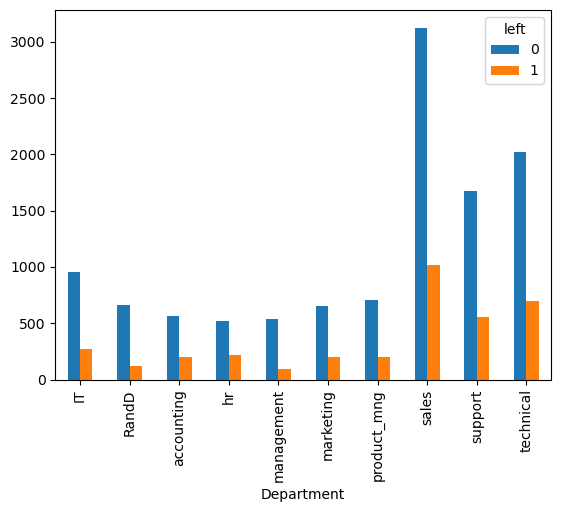

In [189]:
pd.crosstab(df1["Department"],df1["left"]).plot(kind="bar")

<Axes: xlabel='salary'>

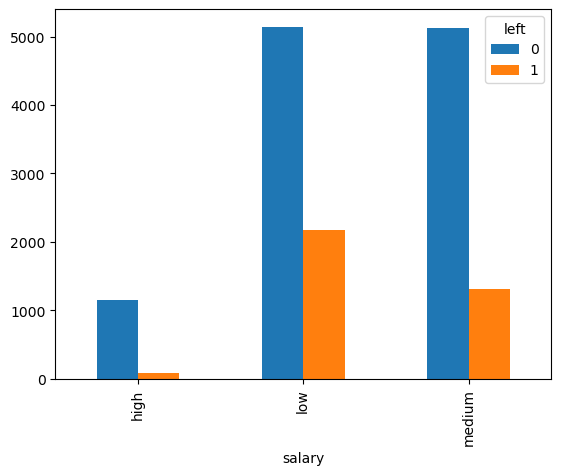

In [193]:
pd.crosstab(df1["salary"],df1["left"]).plot(kind="bar")

# Logistic Regression - Multiclass Classification

In [197]:
from sklearn.datasets import load_digits

In [199]:
digits = load_digits()

In [201]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [227]:
digits.data[11]

array([ 0.,  0.,  0.,  0., 14., 13.,  1.,  0.,  0.,  0.,  0.,  5., 16.,
       16.,  2.,  0.,  0.,  0.,  0., 14., 16., 12.,  0.,  0.,  0.,  1.,
       10., 16., 16., 12.,  0.,  0.,  0.,  3., 12., 14., 16.,  9.,  0.,
        0.,  0.,  0.,  0.,  5., 16., 15.,  0.,  0.,  0.,  0.,  0.,  4.,
       16., 14.,  0.,  0.,  0.,  0.,  0.,  1., 13., 16.,  1.,  0.])

<Figure size 640x480 with 0 Axes>

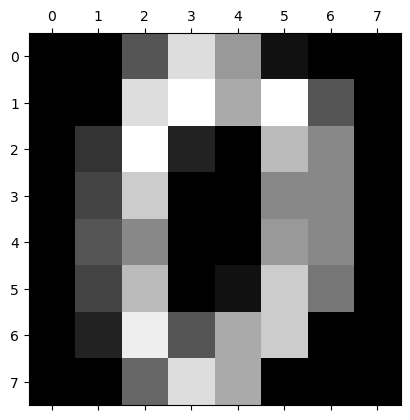

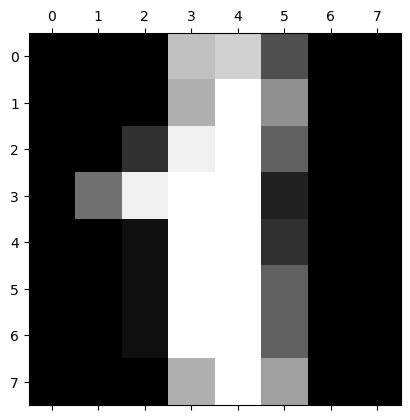

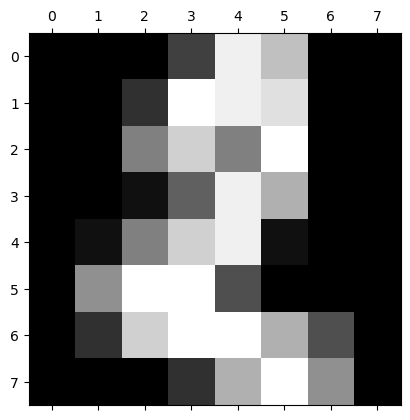

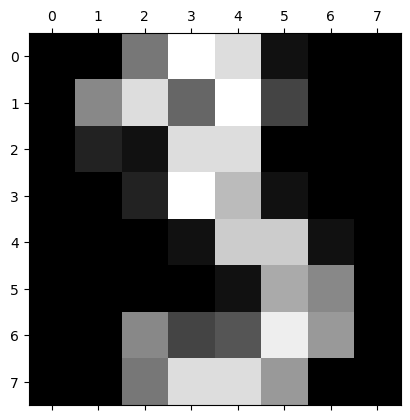

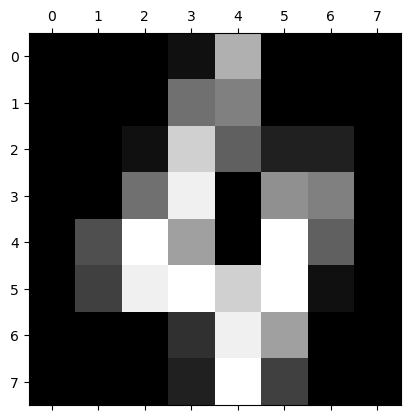

In [229]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [233]:
digits.target[67]

6

In [235]:
digit_model = linear_model.LogisticRegression()

In [237]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size = 0.2, random_state=42)

In [247]:
digit_model.fit(X_train,y_train)

C:\Users\manas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [249]:
digit_model.score(X_test,y_test)

0.9694444444444444

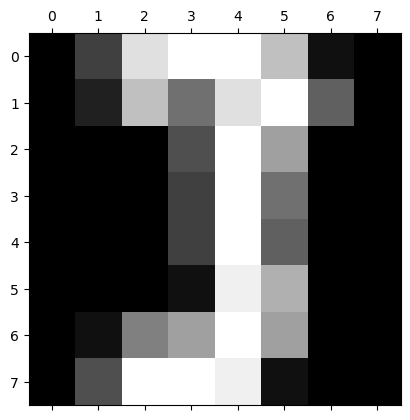

In [255]:
plt.matshow(digits.images[91])

In [265]:
digit_model.predict([digits.data[91]])[0]

3

In [263]:
digits.target[91]

3

In [273]:
digit_model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [89]:
import seaborn as sns

In [279]:
y_predicted = digit_model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predicted)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 44,  0,  1,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 44,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 33,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 29,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 38]], dtype=int64)

<Axes: >

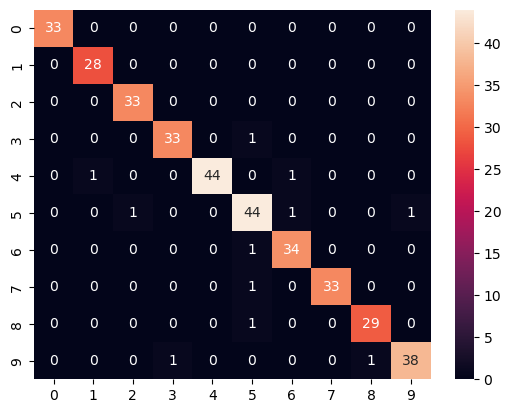

In [283]:
sns.heatmap(cm, annot=True)

# Exercise

In [3]:
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()

In [7]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [37]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target, test_size = 0.2, random_state = 42)

In [45]:
from sklearn import linear_model

In [47]:
iris_model = linear_model.LogisticRegression()
iris_model.fit(X_train,y_train)

LogisticRegression()

In [49]:
iris_model.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [51]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [53]:
iris_model.score(X_test,y_test)

1.0

In [79]:
iris_model.predict([iris.data[71]])

array([1])

In [81]:
iris.target[71]

1

In [83]:
from sklearn.metrics import confusion_matrix

In [85]:
cm = confusion_matrix(y_test,iris_model.predict(X_test))
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

<Axes: >

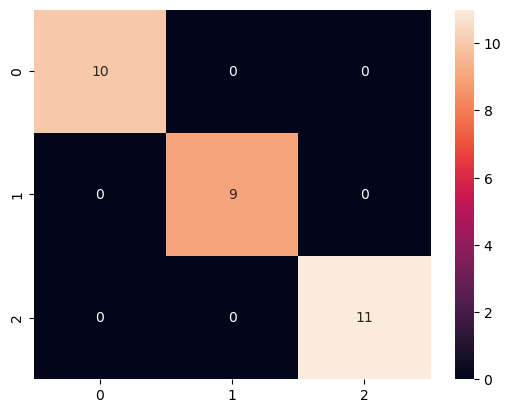

In [91]:
sns.heatmap(cm,annot=True)